In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

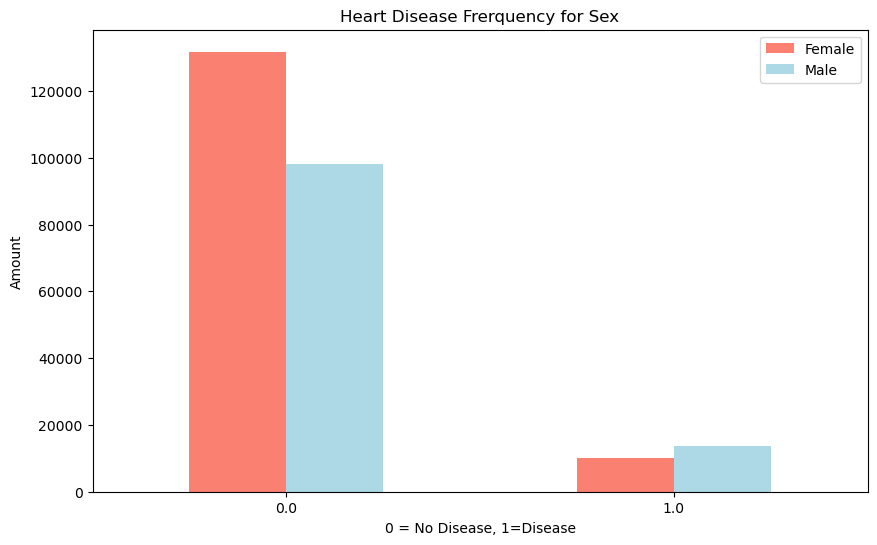

In [28]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='f4VrJBdjnoQix4z__52jRCdTjxwc9nopxiyfVpQHbseM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'cloudprojectml-donotdelete-pr-atkvb9ekvld5en'
object_key = 'Heart_disease_dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
#Create plot of crosstab
pd.crosstab(df_data_1.HeartDiseaseorAttack, df_data_1.Sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

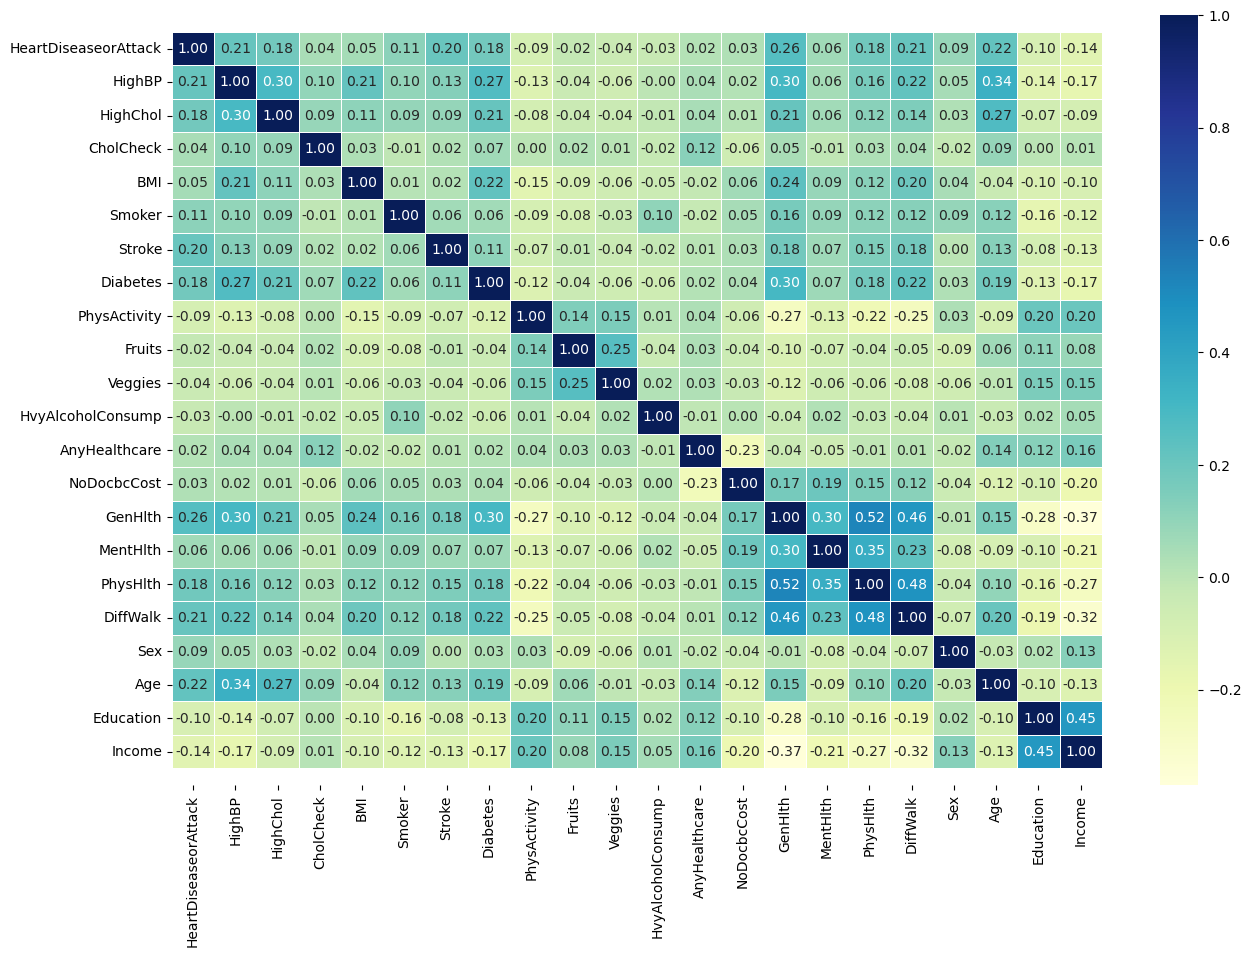

In [29]:
#Visualise correlation
corr_matrix = df_data_1.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

plt.show()

In [30]:
features = ['Stroke','HighBP','Age','DiffWalk','GenHlth']
x = df_data_1[features].values
y = df_data_1['HeartDiseaseorAttack'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Create function to fit and score models
def fit_and_score(model, X_train,X_test,y_train,y_test):
    #dictionary to keep model scores
    model_scores = {}
    #fit model
    model.fit(X_train, y_train)
    #evaluate model and append score
    model_scores=model.score(X_test, y_test)
    return model_scores


In [31]:
# creating logistic regression model with the best params 
model = LogisticRegression()
logistic_score = fit_and_score(model=model, X_train=X_train,X_test=X_test, y_train=y_train,y_test=y_test)
logistic_score

0.9068511510564491

In [32]:
# creating therandom forest classifier model with the best params 
rfc = RandomForestClassifier(n_estimators=300, random_state=0)
rfc_scores = fit_and_score(model=rfc, X_train=X_train,X_test=X_test, y_train=y_train,y_test=y_test)
rfc_scores

0.9070285398927783

In [33]:
# creating decision tree classifier model with the best params 
target = df_data_1['HeartDiseaseorAttack']
features = df_data_1.drop(['HeartDiseaseorAttack','HighChol','CholCheck','Smoker','Diabetes','PhysActivity','Fruits','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','Age','Education','Income','BMI','Veggies','DiffWalk','Sex'], axis=1)
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(features, target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf_scores = fit_and_score(model=clf, X_train=X_trainDT,X_test=X_testDT, y_train=y_trainDT,y_test=y_testDT)
clf_scores

0.9075804162724692

In [37]:
features_ad = df_data_1.drop(['HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','Education','Income','NoDocbcCost','MentHlth','BMI','CholCheck'],axis=1)
target_ad = df_data_1['HeartDiseaseorAttack']
X_trainAD,X_testAD,y_trainAD,y_testAD = train_test_split(features_ad,target_ad, test_size=0.3,random_state=4)
modelAD = AdaBoostClassifier(n_estimators=50)
AD_scores = fit_and_score(model=clf, X_train=X_trainAD,X_test=X_testAD, y_train=y_trainAD,y_test=y_testAD)
AD_scores

0.8943550930305897

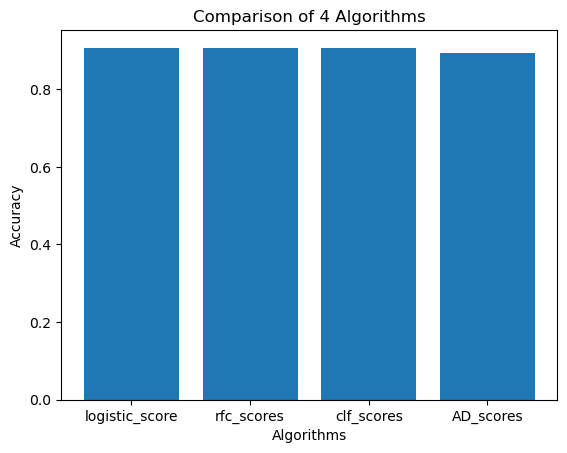

In [38]:
values = [logistic_score, rfc_scores, clf_scores, AD_scores]  # 4 values to compare
labels = ['logistic_score', 'rfc_scores', 'clf_scores', 'AD_scores']  # Labels for each value

# Create a bar chart
plt.bar(labels, values)

# Set chart title and axis labels
plt.title('Comparison of 4 Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Display the chart
plt.show()